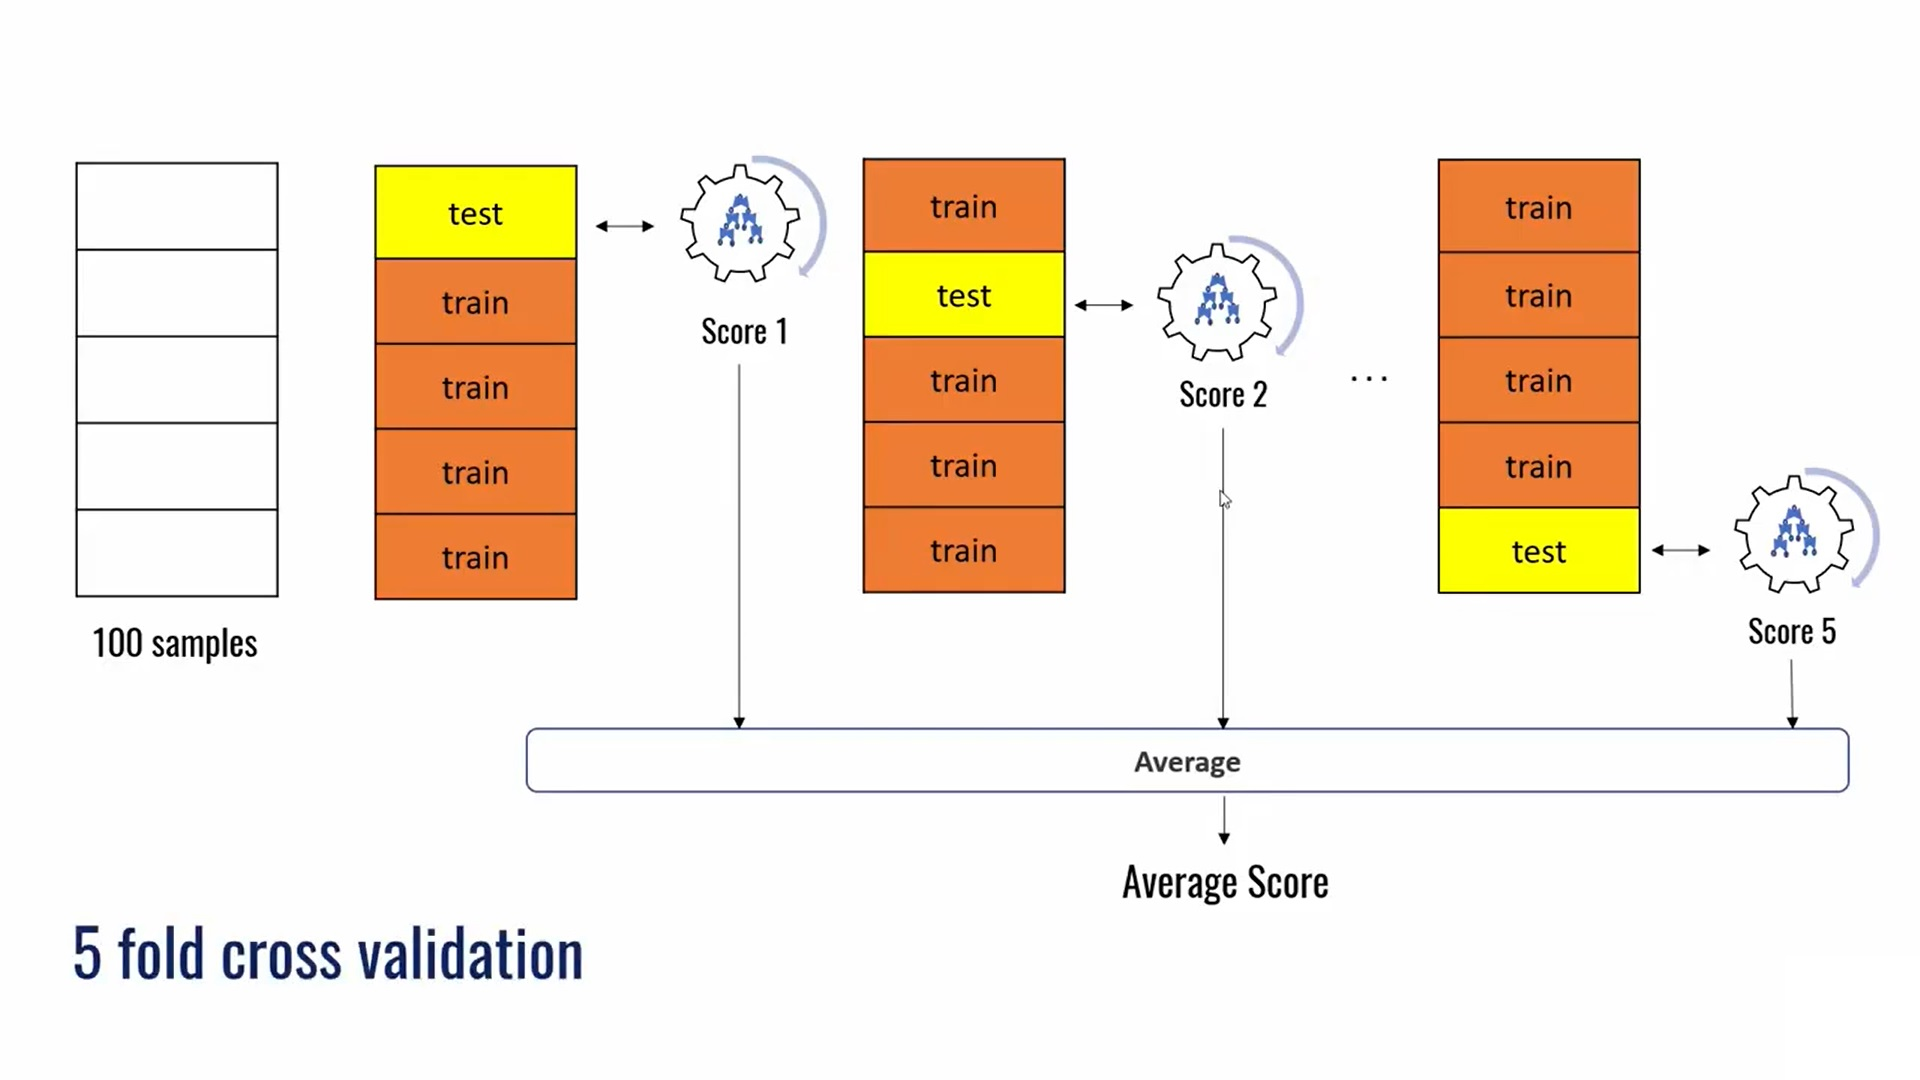

#### We will use digits data set from sklearn.

##    1. Load required libraries.

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()
import warnings
warnings.filterwarnings("ignore")

## 2. Without K-Fold
Train and test data on different models and calculate scores for each model with simple train test split method. 

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)
# Run the above code few times to see how scores changes each time.

In [42]:
# 1. Logistic Regression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9592592592592593

In [43]:
# 2. SVM
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.4777777777777778

In [44]:
# 3. Random Forest
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9666666666666667

Suppose you run the train test split 10 times for a ML algorithm. You'll get different score with each run. Then you would average out the scores to get an average score.<b>This is what K Folds cross validation does.

> ### Extras :
We can define a helper function to train our model. By doing that you need not to write the code every time you train with a new ML algorithm.

In [45]:
# Helper Function

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

# Try it with SVM
get_score(svm,X_train,X_test,y_train,y_test)

0.4777777777777778

In [48]:
# Try it with Logistic Regression
get_score(lr,X_train,X_test,y_train,y_test)

0.9592592592592593

## 3. K Fold

In [49]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

#### Now let's see with a simple example how K Fold works.

In [50]:
kf.split([1,2,3,4,5,6,7,8,9])

<generator object _BaseKFold.split at 0x000001FBD204A2E0>

In [51]:
# Recieving the generator in for loop.
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index,test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [13]:
Got it, how K-Fold works?

Object `works` not found.


In [ ]:
Got it, how K-Fold works

Got it, how K-Fold works

Now will use K-fold to evaluate the performance of all the above three models.

In [52]:
from sklearn.model_selection import StratifiedKFold

Stratified K-Fold is actally a K-Fold but it would divide the data uniformly w.r.t the out put classes/labels so that each divide (fold) has equal number of class types in them. This makes validation more relaiable.

In [53]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_lr = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_lr.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

print('Logistic Regression Score:',scores_lr)
print('SVM Score:',scores_svm)
print('Random Forest Score:',scores_rf)

Logistic Regression Score: [0.8948247078464107, 0.9532554257095158, 0.9098497495826378]
SVM Score: [0.3806343906510851, 0.41068447412353926, 0.5125208681135225]
Random Forest Score: [0.9315525876460768, 0.9582637729549248, 0.9248747913188647]


Great!

Random Forest seems to ne best for training purpose for the given data set. We can check if the score increses or decreases with <b>'hyper parameter tuning'.

Well, all the codes we have typed for making a K-Fold validation needs not to be written in real cases. This was just for demonstartion.

There is function called <b>'cross_val_score'</b> in sklearn library, which does all the above task in just one line of code.

## The 'cross_val_score' functiom

In [55]:
from sklearn.model_selection import cross_val_score

In [59]:
# cross_val_score on Logistic Regression
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

array([0.89482471, 0.95325543, 0.90984975])

In [60]:
# cross_val_score on SVM
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])

In [61]:
# Cross_val_score on Random Forest
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)

array([0.92487479, 0.94991653, 0.93155259])

#### cross_val_score uses stratifield kfold by default and takes fold as 3.

## <h2 style='color:Blue'>Parameter tunning using k fold cross validation</h2>

In [62]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.885949720670391

In [63]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

0.9354469273743016

In [64]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

0.9415394165114834

In [65]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

0.9393202979515827

In [67]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=50),digits.data, digits.target, cv=10)
np.average(scores4)

0.9521477343265052

In [66]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=100),digits.data, digits.target, cv=10)
np.average(scores4)

0.9499099937926753

Oh! It's not necessary that increasing the value of n_estimator (any hyperparameter) would increse the score.